In [1]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import csv

%matplotlib inline

In [75]:
data = requests.get("https://r6tab.com/api/leaderboards.php?sortplatform=uplay&sortregion=p_currentmmr").json()
#data = pd.read_json("https://r6tab.com/api/leaderboards.php?sortplatform=uplay&sortregion=p_currentmmr", lines=True)

In [76]:
dd = pd.DataFrame.from_dict(data)

In [77]:
x = dd["p_currentmmr"]
x = x.values
x = x.astype(np.int)

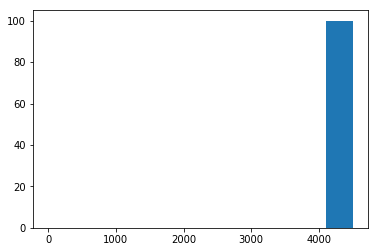

In [78]:
bins = [0,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300,2400,2500,2700,2900,3100,3300,3700,4100,4500]
plt.hist(np.clip(x, bins[0], bins[-1]), bins = bins )
#plt.hist(x)
plt.show()

In [47]:
from bs4 import BeautifulSoup
#scrape elements
COLUMNS = ['Rank', 'Player', 'MMR', 'Games']
dataframes = []
i = 1
url = "https://r6.tracker.network/leaderboards/pvp-season/pc/Mmr?page={}&region=-1&season=12"
#1725
while(i<3):
    try:
        response = requests.get(url.format(i))
        soup = BeautifulSoup(response.content, "html.parser")
        table = soup.find("table") # Find the "table" tag in the page
        rows = table.find_all("tr") # Find all the "tr" tags in the table
        cy_data = []
        for row in rows:
            cells = row.find_all("td") #  Find all the "td" tags in each row
            cells = cells[0:4] # Select the correct columns
            cy_data.append([cell.text for cell in cells]) # For each "td" tag, get the text inside it

        dataframes.append(pd.DataFrame(cy_data, columns=COLUMNS).drop(0, axis=0))
        i= i+1
        print(i)
    except:
        break
final = pd.concat(dataframes)
print("finished")

2
3
finished


In [10]:
#final = final.set_index('Rank')
final2.tail()

,Rank,Player,MMR,Games
96,166396,\nlrmingo\n\n,531.60,24
97,166397,\nFree_Jahlestine\n\n,530.66,31
98,166398,\ntahribatp\n\n,530.50,69
99,166399,\nMoiado.Liquid\n\n,529.93,30
100,166400,\njustengineer10\n\n,528.70,105


(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0., 200.]),
 array([   0, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300,
        2400, 2500, 2700, 2900, 3100, 3300, 3700, 4100, 4500]),
 <a list of 19 Patch objects>)

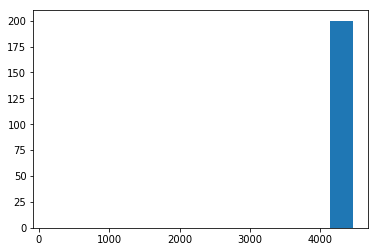

In [67]:
final2 = final.copy()
final2["MMR"] = final2["MMR"].str.replace(',','')
x = final2["MMR"]
x = x.values
x = x.astype(np.double)
bins = [0,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300,2400,2500,2700,2900,3100,3300,3700,4100,4500]
plt.hist(np.clip(x, 0, 4500), bins = bins, rwidth = 0.8)

In [41]:
final2["Player"] = final2["Player"].str.replace('\n','')

In [42]:
final2["Player"].head()

1         Sonic.Gary
2    LoliconKing.Tum
3          Epsid.NYX
4            Ron1n_N
5     DarmoNt.Ghetto
Name: Player, dtype: object

In [43]:
final2.to_csv('/Users/Kyle_Staples/Desktop/out2.csv', sep=',', encoding='utf-8')

,Rank,Player,MMR,Games
54,73054,A-1.-,2692.24,630
57,131656,A-Alpha_Wolfie,2139.17,13
52,109952,A-Alpha_Wolfie,2370.20,5
16,43516,A-B-C.,3019.21,156
94,63794,A-Chill-Rhino,2780.84,132
84,100484,A-Cute-Cow,2455.38,2
42,148042,A-DevilHasTaken,1858.35,152
8,81808,A-Empress,2618.60,3
41,5741,A-FISHER.4E,4022.46,248
31,89031,A-Fisher,2549.54,159
